# 베이즈 텍스트 분석

다루는 내용
--

- 메일이 스팸메일인지 아닌지 예측

데이터
--
- https://goo.gl/2WWtcs

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/swkim01/DSAC1-2/blob/main/gg-16-스팸메시지필터링.ipynb"><img src="https://github.com/swkim01/DSAC1-2/raw/main/colab_logo_32px.png" />구글 코랩에서 실행</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/swkim01/DSAC1-2/blob/main/gg-16-스팸메시지필터링.ipynb"><img src="https://github.com/swkim01/DSAC1-2/raw/main/GitHub-Mark-32px.png" />깃헙에서 소스 보기</a>
  </td>
</table>

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

데이터 읽기
--

In [1]:
!mkdir -p data
!curl -L https://bit.ly/2WC9nvn -o data/sms_spam.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   141  100   141    0     0    344      0 --:--:-- --:--:-- --:--:--   343
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  488k  100  488k    0     0   450k      0  0:00:01  0:00:01 --:--:--  450k


In [3]:
sms = pd.read_csv('data/sms_spam.csv')
sms.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.shape

(5574, 2)

In [5]:
sms['type'].value_counts()

ham     4827
spam     747
Name: type, dtype: int64

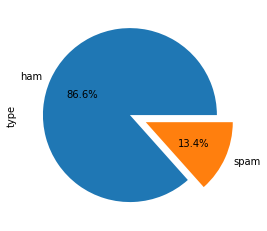

In [6]:
sms['type'].value_counts().plot(kind='pie', explode=[0, 0.2], autopct='%1.1f%%')

In [7]:
sms_corpus = sms['text'] 

단어-벡터 생성
--

In [8]:
vectorizer = CountVectorizer(min_df=10) # 10번 이하로 발생한 단어 무시
X = vectorizer.fit_transform(sms_corpus)
X.shape

(5574, 1018)

- BOW(bag of word)
   * 1018개의 단어, 빈도 수

In [9]:
y = sms['type'] 
y[:5]

0     ham
1     ham
2    spam
3     ham
4     ham
Name: type, dtype: object

In [10]:
X[:5].toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

- BOW(bag of word)
   * 대부분 0 : sparse matrix

In [11]:
X[:5].toarray().argmax(axis=1)

array([ 92, 462, 866, 731, 393])

### WordCloud

In [13]:
spam_sms = sms[sms["type"] == "spam"]["text"]
ham_sms = sms[sms["type"] == "ham"]["text"]

spam_words = []
ham_words = []

In [14]:
spam_sms.values.shape

(747,)

In [15]:
!pip install nltk

In [16]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [17]:
for i in range(spam_sms.values.shape[0]):
    msg = spam_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    spam_words = spam_words + words
len(spam_words)

9413

In [18]:
!pip install wordcloud

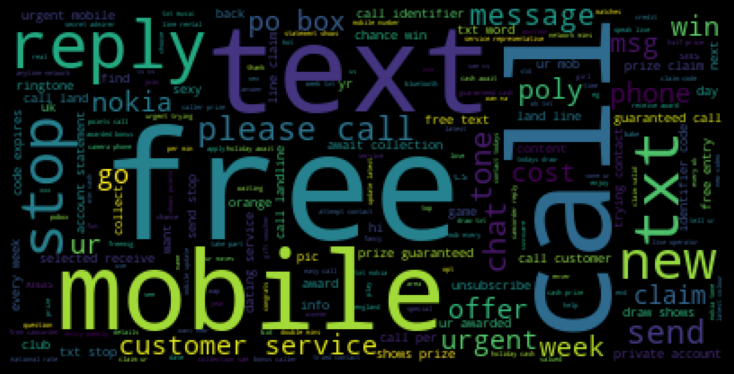

In [19]:
from wordcloud import WordCloud
wc = WordCloud(width=400, height=200)
spam_wordcloud = wc.generate(" ".join(spam_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

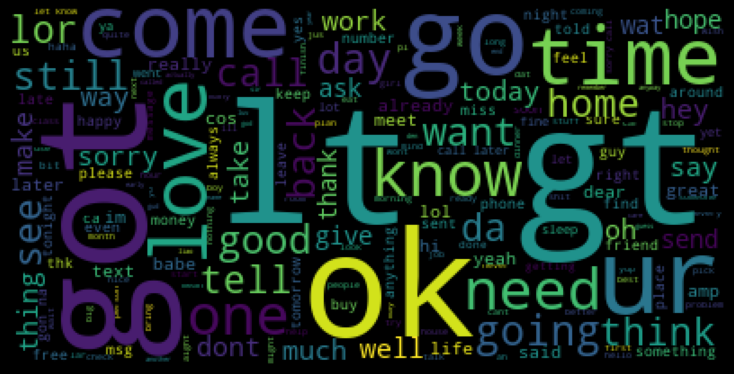

In [20]:
for i in range(ham_sms.values.shape[0]):
    msg = ham_sms.values[i]
    words = [word.lower() for word in word_tokenize(msg) 
                               if word.lower() not in stopwords.words('english') and
                                  word.lower().isalpha()]
    ham_words = ham_words + words
    
wc = WordCloud(width=400, height=200)
ham_wordcloud = wc.generate(" ".join(ham_words))
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

베이즈 알고리즘 적용
--

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.toarray(), y, test_size=0.25)

In [ ]:
clf = GaussianNB() 
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test).round(4))

0.8099


In [ ]:
y_predict = clf.predict(X_test) 
print(metrics.classification_report(y_test, y_predict)) 

              precision    recall  f1-score   support

         ham       0.99      0.79      0.88      1206
        spam       0.41      0.94      0.57       188

   micro avg       0.81      0.81      0.81      1394
   macro avg       0.70      0.87      0.72      1394
weighted avg       0.91      0.81      0.84      1394



In [ ]:
print(metrics.confusion_matrix(y_test, y_predict))

[[952 254]
 [ 11 177]]
